In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 10000
training_epochs = 200
nb_classes = 4
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_10dB.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:21]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data)

(40000, 20) (40000, 4)
[[ 0.06907259 -0.7754382  -0.02926022 ... -0.70710677  0.70710677
  -0.70710677]
 [ 0.22259928 -0.39343154 -0.27505288 ... -0.70710677  0.70710677
  -0.70710677]
 [ 0.3979375  -0.57233614 -0.14153855 ... -0.70710677  0.70710677
  -0.70710677]
 ...
 [ 0.09748081 -0.8959886  -0.5795385  ... -0.70710677  0.70710677
  -0.70710677]
 [-0.7765729  -1.1802692   0.63803524 ... -0.70710677  0.70710677
  -0.70710677]
 [ 1.7183214   1.642255    0.2505213  ... -0.70710677  0.70710677
  -0.70710677]]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=640, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=320, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               13440     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               205120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1284      
Total params: 219,844
Trainable params: 219,844
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , validation_split=0.2, epochs=training_epochs)

Epoch 1/200
4/4 [==============================] - 1s 49ms/step - loss: 1.7830 - accuracy: 0.3153 - val_loss: 3.6000 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 1.6523 - accuracy: 0.4620 - val_loss: 3.7426 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 1.5542 - accuracy: 0.5760 - val_loss: 3.1764 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 1.4420 - accuracy: 0.6607 - val_loss: 2.7353 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 1.3358 - accuracy: 0.7034 - val_loss: 2.6901 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 1.2208 - accuracy: 0.7355 - val_loss: 2.8145 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 1.1113 - accuracy: 0.7618 - val_loss: 2.7252 - val_accuracy: 0.0

Epoch 59/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2572 - accuracy: 0.9394 - val_loss: 0.5350 - val_accuracy: 0.8115
Epoch 60/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2592 - accuracy: 0.9378 - val_loss: 0.5255 - val_accuracy: 0.8183
Epoch 61/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2566 - accuracy: 0.9382 - val_loss: 0.5154 - val_accuracy: 0.8200
Epoch 62/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2553 - accuracy: 0.9382 - val_loss: 0.5136 - val_accuracy: 0.8202
Epoch 63/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2537 - accuracy: 0.9379 - val_loss: 0.5131 - val_accuracy: 0.8200
Epoch 64/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2533 - accuracy: 0.9407 - val_loss: 0.5096 - val_accuracy: 0.8220
Epoch 65/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2512 - accuracy: 0.9395 - val_loss: 0.5173 - val_accuracy: 0.8190
Epoch 66/200


Epoch 117/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2246 - accuracy: 0.9417 - val_loss: 0.4986 - val_accuracy: 0.8220
Epoch 118/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2272 - accuracy: 0.9390 - val_loss: 0.4386 - val_accuracy: 0.8478
Epoch 119/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2249 - accuracy: 0.9414 - val_loss: 0.5065 - val_accuracy: 0.8192
Epoch 120/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2253 - accuracy: 0.9416 - val_loss: 0.4555 - val_accuracy: 0.8404
Epoch 121/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2238 - accuracy: 0.9416 - val_loss: 0.4713 - val_accuracy: 0.8322
Epoch 122/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2222 - accuracy: 0.9434 - val_loss: 0.4747 - val_accuracy: 0.8319
Epoch 123/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2239 - accuracy: 0.9405 - val_loss: 0.4458 - val_accuracy: 0.8443
Epoch 

Epoch 175/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2110 - accuracy: 0.9433 - val_loss: 0.4354 - val_accuracy: 0.8429
Epoch 176/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2114 - accuracy: 0.9432 - val_loss: 0.4691 - val_accuracy: 0.8295
Epoch 177/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2096 - accuracy: 0.9423 - val_loss: 0.4527 - val_accuracy: 0.8369
Epoch 178/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2105 - accuracy: 0.9436 - val_loss: 0.4436 - val_accuracy: 0.8421
Epoch 179/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2099 - accuracy: 0.9428 - val_loss: 0.4713 - val_accuracy: 0.8310
Epoch 180/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2105 - accuracy: 0.9430 - val_loss: 0.4622 - val_accuracy: 0.8349
Epoch 181/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2093 - accuracy: 0.9429 - val_loss: 0.4471 - val_accuracy: 0.8404
Epoch 

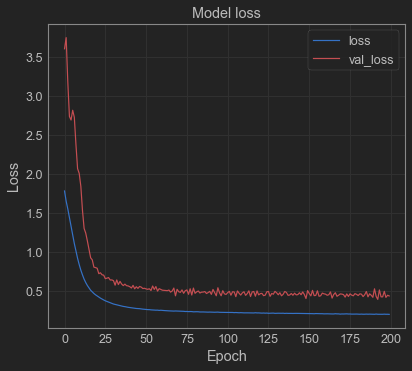

In [8]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

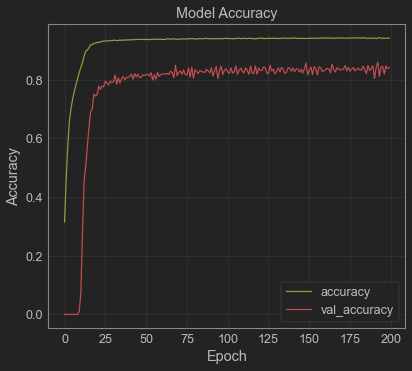

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_10dB_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:21]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(8000, 20) (8000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

250/250 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.9244
loss:  0.24794088304042816
accuracy 0.9243749976158142


In [14]:
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
# for p, y in zip(pred, y_test_bit.flatten()):
 #   print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

In [15]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        #print("False : {}".format(i))
        #print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                #print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                #print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

Error : 605
Error Count: 642


In [16]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.0200625
